## Short Wave Opacities - Wiggle Behaviour

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from types import SimpleNamespace

import dsharp_opac as do
plt.rcParams["figure.figsize"] = (15,9)

Start off by defining a wavelength and grain size array. As mentioned in my email, the examples I had previously showed you were for a single grain size instead of a distribution. Nonetheless, by setting a sufficiently narrow size distribution it replicates this behaviour that I am curious about (the wiggles).

In [55]:
lams = np.geomspace(0.1e-4,1e-4,201) # This is the wavelength range I am using in my data and hence why it is of interest
ai = np.geomspace(0.99e-4,1.01e-4,200)
a = 0.5*(ai[1:]+ai[:-1])

Next is to get the optical constants.

In [56]:
oc,rho_s = do.get_dsharp_mix()

Please cite Warren & Brandt (2008) when using these optical constants
Please cite Draine 2003 when using these optical constants
Reading opacities from troilitek
Please cite Henning & Stognienko (1996) when using these optical constants
Reading opacities from organicsk
Please cite Henning & Stognienko (1996) when using these optical constants
| material                            | volume fractions | mass fractions |
|-------------------------------------|------------------|----------------|
| Water Ice (Warren & Brandt 2008)    | 0.3642           | 0.2            |
| Astronomical Silicates (Draine 2003)| 0.167            | 0.329          |
| Troilite (Henning)                  | 0.02578          | 0.07434        |
| Organics (Henning)                  | 0.443            | 0.3966         |


In the following two cells I have computed the opacities and then size averaged opacities, but using two methods. The first is the way you included in the notebook you sent me. The second is how I had originally implemented it- this uses a different function from the package (`size_average_opacity()` instead of `get_size_averged_opacity()`), and does the calculations for each wavelength.

In [57]:
# Method 1 (see plot)
res = SimpleNamespace(**do.get_opacities(a=a,lam=lams,rho_s=rho_s,diel_const=oc,extrapol=True,extrapolate_large_grains=True))

a_max = 1e-4
N = do.powerlaw_N_of_a(a,a_max,3.5,rho_s)
sao1 = SimpleNamespace(**do.get_size_averaged_opacity(a,lams,N,rho_s,kappa_abs=res.k_abs,kappa_sca=res.k_sca))
    

Mie ... Done!


In [58]:
# Method 2 (see plot)
size_index = a.searchsorted(a_max)
kabs = []
ksca = []
for j in lams:
    sao2 = do.size_average_opacity(lam_avg = j,a=a,lam=lams,k_abs=res.k_abs,
                                   k_sca=res.k_sca,q=3.5,plot=False) # Different funciton implemented here
    kabs.append(sao2['ka'][:,size_index][0]) # index the resulting array corresponding to the a_max
    ksca.append(sao2['ks'][:,size_index][0])

Finally, plotting the opacities (with both methods) we can see the oscillations in the absorption but also on a larger scale in the scattering. I am curious if there is a physical explanation for this? Or could it be due to the calculations transitioning into the geometric regime (as for 1 micron we have our grain size comparable to the wavelength range)

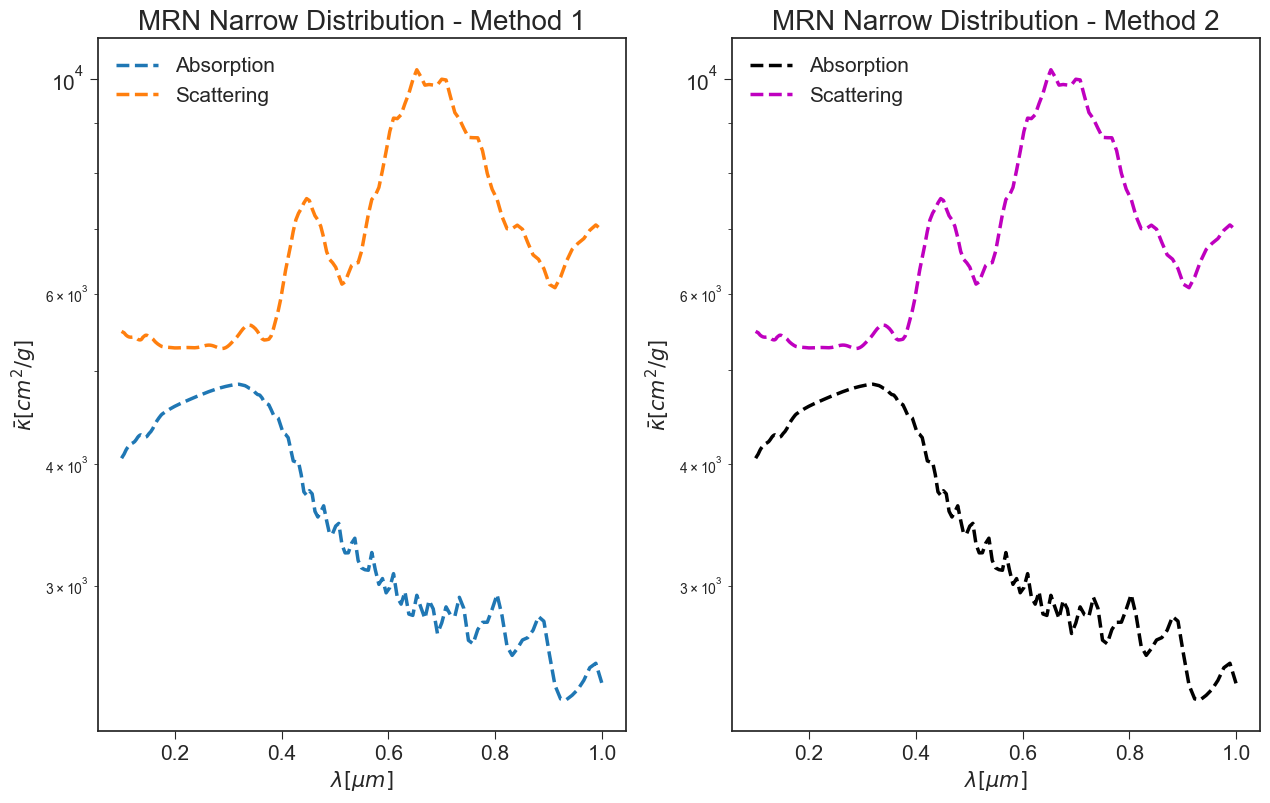

In [59]:
fig,ax = plt.subplots(1,2)

ax[0].semilogy(1e4*lams,sao1.kappa_abs_m,'--',label='Absorption',linewidth=2.5)
ax[0].semilogy(1e4*lams,sao1.kappa_sca_m,'--',label='Scattering',linewidth=2.5)

ax[1].semilogy(1e4*lams,kabs,'k--',label='Absorption',linewidth=2.5)
ax[1].semilogy(1e4*lams,ksca,'m--',label='Scattering',linewidth=2.5)

ax[0].set_xlabel(r'$ \lambda [\mu m]$',fontsize=15)
ax[1].set_xlabel(r'$ \lambda [\mu m]$',fontsize=15)
ax[0].set_ylabel(r'$\bar \kappa [cm^2/g]$',fontsize=15)
ax[1].set_ylabel(r'$\bar \kappa [cm^2/g]$',fontsize=15)

ax[0].xaxis.set_tick_params(labelsize=15)
ax[1].xaxis.set_tick_params(labelsize=15)
ax[0].yaxis.set_tick_params(labelsize=15)
ax[1].yaxis.set_tick_params(labelsize=15)

ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

ax[0].set_title('MRN Narrow Distribution - Method 1',fontsize=20)
ax[1].set_title('MRN Narrow Distribution - Method 2',fontsize=20);